In [11]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pymc as pm
import arviz as az

In [12]:
import numpy as np 

w = 15
np.random.seed(10)

y = np.random.uniform(low = 0, high = w , size = 100)

In [13]:
x = np.linspace(8,20,90)

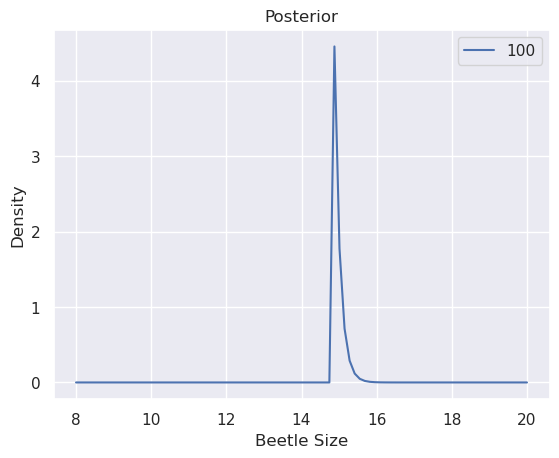

In [23]:
np.random.seed(10)
alpha = 1
beta_1 = 10
observation_days = [1, 10, 50, 100]

def plot_posterior_distributions(days, observations):
    for day in days:
        a_updated = alpha + day
        b_updated = max(beta_1, max(observations[:day]))
    
        x = np.linspace(8, 20, 90)
    
        pdf = a_updated * (b_updated ** a_updated) / (x ** (a_updated + 1))
        pdf[x < b_updated] = 0
        
    plt.plot(x, pdf, label=day)
    
    plt.xlabel('Beetle Size')
    plt.ylabel('Density')
    plt.title('Posterior')
    plt.legend()
    plt.show()
    return pdf
pdf = plot_posterior_distributions(observation_days, y)

In [25]:
x = np.linspace(8, 20, 90)
x

array([ 8.        ,  8.13483146,  8.26966292,  8.40449438,  8.53932584,
        8.6741573 ,  8.80898876,  8.94382022,  9.07865169,  9.21348315,
        9.34831461,  9.48314607,  9.61797753,  9.75280899,  9.88764045,
       10.02247191, 10.15730337, 10.29213483, 10.42696629, 10.56179775,
       10.69662921, 10.83146067, 10.96629213, 11.1011236 , 11.23595506,
       11.37078652, 11.50561798, 11.64044944, 11.7752809 , 11.91011236,
       12.04494382, 12.17977528, 12.31460674, 12.4494382 , 12.58426966,
       12.71910112, 12.85393258, 12.98876404, 13.12359551, 13.25842697,
       13.39325843, 13.52808989, 13.66292135, 13.79775281, 13.93258427,
       14.06741573, 14.20224719, 14.33707865, 14.47191011, 14.60674157,
       14.74157303, 14.87640449, 15.01123596, 15.14606742, 15.28089888,
       15.41573034, 15.5505618 , 15.68539326, 15.82022472, 15.95505618,
       16.08988764, 16.2247191 , 16.35955056, 16.49438202, 16.62921348,
       16.76404494, 16.8988764 , 17.03370787, 17.16853933, 17.30

In [22]:
b_updated = max(beta_1, max(y[:100]))
b_updated

14.814382123528084

In [26]:
pdf[x < b_updated] = 0

In [27]:
pdf

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.45210484e+00,
       1.77370395e+00, 7.12477016e-01, 2.88516868e-01, 1.17766157e-01,
      

# Question 3
This notebook contains some starter code for Question 3 of Homework 2. This is not the same as the skeleton code that you see in the lab assignments. You may (and should) add cells of your own code as you work through Question 3.

In [ ]:
# Your code to load the data goes here
dcd_full = ...

# Do not change this line
states_to_use = ('California', 'District of Columbia', 'Nevada', 'Oregon', 'Texas')

# Your code to filter down to the states above goes here
dcd = ...


In [ ]:
# This line gives the state index corresponding to each row
state_indices_full = dcd_full['state_name'].astype('category').cat.codes
state_indices = dcd['state_name'].astype('category').cat.codes

In [ ]:
# This cell shows you a very simple example of "fancy indexing"
array_of_values = np.array([42, 672, 9001])
array_of_indices = np.array([1, 1, 0, 2, 0, 0])

array_of_values[array_of_indices]

In [ ]:
# This cell shows you an example of how to use "fancy indexing" with the state indices (above)
# to take an array with one item per state and get the corresponding item for each district
# You don't have to fill anything in here, but understanding it will help you later!

# An array with the population of each of our five states of interest (CA, DC, NV, OR, TX)
state_population_2020 = np.array([39538223, 689545, 3104614, 4237256, 29145505])
state_pop_for_county = state_population_2020[state_indices]
dcd.loc[:, 'state_pop'] = state_pop_for_county

# The state_pop column now contains the population for each district's state
dcd.loc[:, ['state_name', 'district', 'fundinggap', 'state_pop']]

In [ ]:
...

In [ ]:
# You don't have to change 
def plot_state_posterior_means(trace, state_names, **kwargs):
    """Shows distribution of posterior means from a PyMC trace.

    Args:
        trace: the result of pm.sample(...).
            Assumes the state-level means have been called 'mu'
        state_names: a list or array of state names
        **kwargs: any extra arguments are passed in to sns.histplot
    """
    num_state = len(state_names)
    mu_array = trace.posterior['mu'].values.reshape(-1, num_states)
    means_wide = pd.DataFrame(mu_array, columns=state_names)
    means_long = pd.melt(means_wide, var_name='State', value_name='Posterior mean')
    sns.histplot(means_long, x='Posterior mean', hue='State', bins=np.linspace(-5000, 4000, 500))

In [ ]:
# If implemented correctly, your solutions to 3(d), 3(e), 3(g), and 3(h) shouldn't take more than one minute to run.
# Hint: your solution should use the state_indices array defined earlier!
num_states = 5
with ...:
    # Your code for the random variables goes here
    ...
    # Don't change this line
    trace_d = pm.sample(5, chains=2, tune=100, return_inferencedata=True)


Hint: the rows of the `mu` array in the posterior correspond to the five states in the `states_to_use` array, in the same order.

In [ ]:
plot_state_posterior_means(trace_d, states_to_use)

In [ ]:
...